## Training data

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

i2class_dic = {}
datagen = ImageDataGenerator()
train_gen = datagen.flow_from_directory("../image_search/data_sub22850/train/", batch_size=1)
for k, v in train_gen.class_indices.iteritems():
    i2class_dic[v] = k
    print k

Found 28850 images belonging to 10 classes.
n07579787-plate
n07565083-menu
n04204238-shopping_basket
n07697313-cheeseburger
n04542943-waffle_iron
n07697537-hotdog
n03871628-packet
n07695742-pretzel
n07831146-carbonara
n04476259-tray


## Top 3 categories of the 5 normal testing images by vgg16 

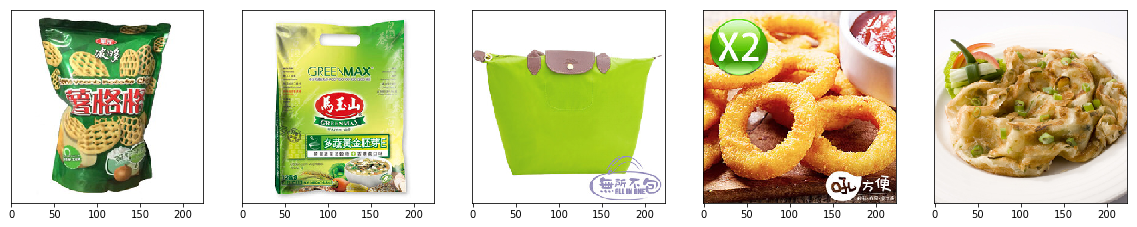

['n03871628-packet, 0.199', 'n03908618-pencil_box, 0.075', 'n03188531-diaper, 0.063']
['n03871628-packet, 0.980', 'n03958227-plastic_bag, 0.013', 'n04357314-sunscreen, 0.001']
['n04204238-shopping_basket, 0.580', 'n02909870-bucket, 0.161', 'n03709823-mailbag, 0.051']
['n07695742-pretzel, 0.934', 'n07693725-bagel, 0.017', 'n02776631-bakery, 0.012']
['n07831146-carbonara, 0.541', 'n07579787-plate, 0.187', 'n07583066-guacamole, 0.050']


In [4]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras.applications.vgg16 as vgg16
import numpy as np

imgs = [
    image.load_img("../../tmp/potato.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/greenmax.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/green_bag.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/onion_ring.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/scallion_pancake.jpg", target_size=(224, 224)) 
]

plt.figure(figsize=(20, 10))
for i, img in enumerate(imgs, start=1):
    plt.subplot(1, 5, i)
    axesImg = plt.imshow(img)
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()

na_imgs = [ image.img_to_array(img) for img in imgs ]    
na_imgs = np.array(na_imgs)
na_imgs = vgg16.preprocess_input(na_imgs)

model = vgg16.VGG16(weights='imagenet')
preds = model.predict(na_imgs)
for topk in vgg16.decode_predictions(preds, top=3):
    print([ '{}-{}, {:.3f}'.format(t[0], t[1], t[2]) for t in topk ])

## Variation of testing images

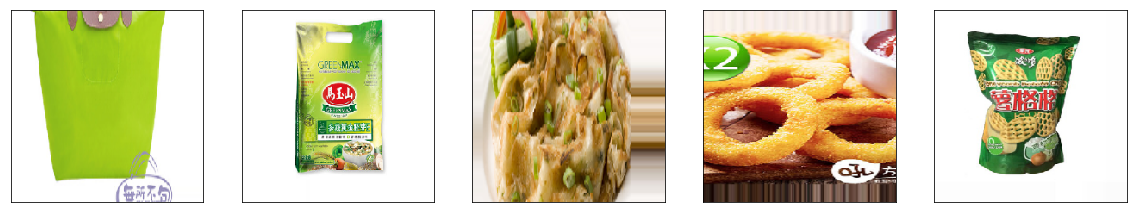

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import keras.applications.vgg16 as vgg16
import keras.layers as layers
from keras.models import Model

na_imgs = [ image.img_to_array(img) for img in imgs ]    
na_imgs = np.array(na_imgs)

varImgs = None
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.5,
    fill_mode='nearest'
)

plt.figure(figsize=(20, 10))
for augImgs in datagen.flow(na_imgs, batch_size=5):
    varImgs = augImgs
    for i in range(na_imgs.shape[0]):
        plt.subplot(1, 5, i + 1)
        fig = plt.imshow(augImgs[i])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.show()
    
    break    

### 1st category of the variation testing images by vgg16

In [6]:
import keras.applications.vgg16 as vgg16
import keras.layers as layers
from keras.models import Model
m_vgg16 = vgg16.VGG16(weights='imagenet')
preds = m_vgg16.predict(varImgs)
for topk in vgg16.decode_predictions(preds, top=1):
    print([ '{}-{}, {:.3f}'.format(t[0], t[1], t[2]) for t in topk ])

['n03788365-mosquito_net, 0.071']
['n03291819-envelope, 0.083']
['n03788365-mosquito_net, 0.084']
['n03788365-mosquito_net, 0.163']
['n15075141-toilet_tissue, 0.114']


### 1st category of the variation testing images by augmentation fine tuned vgg16

In [7]:
base_model = vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))
x = layers.Flatten(name='flatten')(base_model.output)
x = layers.Dense(256, activation='relu', name='fc1')(x)
x = layers.Dense(256, activation='relu', name='fc2')(x)
predictions = layers.Dense(10, activation='softmax', name='predictions')(x)
accCateg_model = Model(inputs=base_model.input , outputs=predictions)
accCateg_model.load_weights('../image_search/data_sub.1step.block5.fc2-u256.aug.h5')
preds = accCateg_model.predict(varImgs)
topI = preds.argmax(axis=-1)
for i in topI:
    print i2class_dic[i]

n04204238-shopping_basket
n03871628-packet
n07579787-plate
n07695742-pretzel
n03871628-packet


## Image Retrieval based on the similarity of the feature vectors
### Top-k from Accurate Classification model

load ../image_search/data_sub.1step.block5.fc2-u256.aug.feavct/data_sub.1step.block5.fc2-u256.aug.feavct.0.feas.npy ...
load ../image_search/data_sub.1step.block5.fc2-u256.aug.feavct/data_sub.1step.block5.fc2-u256.aug.feavct.0.bns.npy ...
calculate norm for each image feature vecture ...
[ 80794.765625    14388.99316406  31121.44726562 ...,  40213.32421875
  12605.875       41215.421875  ]
[WARN] feature datasets are not found, ../image_search/data_sub.1step.block5.fc2-u256.aug.feavct/data_sub.1step.block5.fc2-u256.aug.feavct.1.bns.npy ../image_search/data_sub.1step.block5.fc2-u256.aug.feavct/data_sub.1step.block5.fc2-u256.aug.feavct.1.feas.npy
load feature dataset: 0 secs


sim_imgs_flat_model.py:231: RuntimeWarning: invalid value encountered in divide
  sim = 1 - sim/LA.norm(imgFea1D)/norm_imgFea1Ds


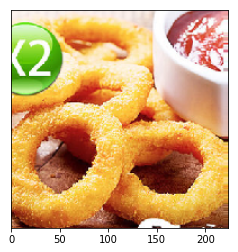

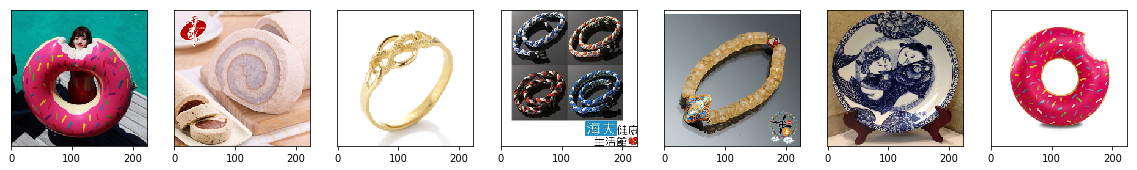

In [7]:
import numpy as np
from sim_imgs_flat_model import load_fea_dataset, load_model_arch_weight, search_sim_images, cosine_similarity_list

accCateg_model = Model(inputs=accCateg_model.input, outputs=accCateg_model.get_layer('fc2').output)

img3D = varImgs[0]
img4D = np.expand_dims(img3D, axis=0)
imgFea = accCateg_model.predict(img4D)

imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list = load_fea_dataset('../image_search/data_sub.1step.block5.fc2-u256.aug.feavct')
simImgBNs = cosine_similarity_list(imgFea, imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list)
simImgFNs = map(lambda f: f + '.jpg', simImgBNs)

axesImg = plt.imshow(img3D)
axesImg.axes.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 10))
for i in range(7):
    plt.subplot(1, 7, i+1)
    axesImg = plt.imshow(image.load_img('../image_search/img_sub22850/{}'.format(simImgFNs[i]), target_size=(224, 224)))
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()

### Top-k from Autoencoder model

load ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.0.feas.npy ...
load ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.0.bns.npy ...
calculate norm for each image feature vecture ...
[ 466.64416504  306.85348511   84.00910187 ...,  250.48065186   91.53101349
   67.97904968]
[WARN] feature datasets are not found, ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.1.bns.npy ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.1.feas.npy
load feature dataset: 0 secs


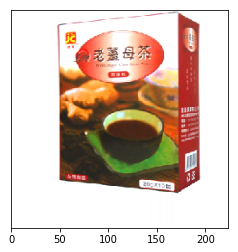

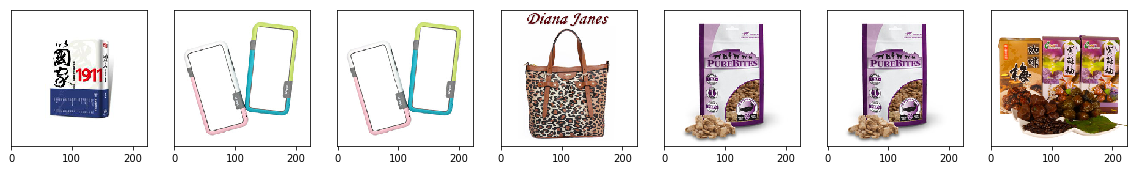

In [9]:
from sim_imgs_flat_model import load_fea_dataset, load_model_arch_weight, search_sim_images
from keras.preprocessing import image
import matplotlib.pyplot as plt

autoencoder_model = load_model_arch_weight('../image_search/data_sub.aug.autoencoder.block5.fc2-u4096.json', '../image_search/data_sub.aug.autoencoder.block5.fc2-u4096.h5')

img3D = varImgs[1]
img4D = np.expand_dims(img3D, axis=0)
imgFea = autoencoder_model.predict(img4D)

imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list = load_fea_dataset('../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5')
simImgBNs = cosine_similarity_list(imgFea, imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list)
simImgFNs = map(lambda f: f + '.jpg', simImgBNs)

axesImg = plt.imshow(img3D)
axesImg.axes.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 10))
for i in range(7):
    plt.subplot(1, 7, i+1)
    axesImg = plt.imshow(image.load_img('../image_search/img_sub22850/{}'.format(simImgFNs[i]), target_size=(224, 224)))    
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()

### Top-k from Siamese model

load ../image_search/img_sub16.aug.simese.fc2-u4096.feavct/img_sub16.aug.simese.fc2-u4096.feavct.0.feas.npy ...
load ../image_search/img_sub16.aug.simese.fc2-u4096.feavct/img_sub16.aug.simese.fc2-u4096.feavct.0.bns.npy ...
calculate norm for each image feature vecture ...
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[WARN] feature datasets are not found, ../image_search/img_sub16.aug.simese.fc2-u4096.feavct/img_sub16.aug.simese.fc2-u4096.feavct.1.bns.npy ../image_search/img_sub16.aug.simese.fc2-u4096.feavct/img_sub16.aug.simese.fc2-u4096.feavct.1.feas.npy
load feature dataset: 0 secs


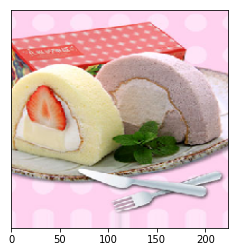

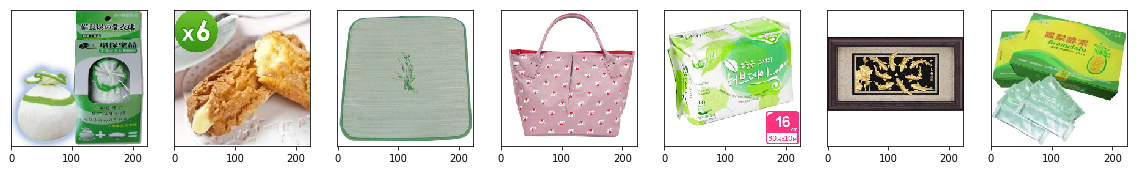

In [12]:
from sim_imgs_flat_model import load_fea_dataset, load_model_arch_weight, search_sim_images, cosine_similarity_list
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
import keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

imgs = [
    image.load_img("../image_search/img_sub16/1046318_L.jpg", target_size=(224, 224)),
    image.load_img("../image_search/img_sub16/1072004_L.jpg", target_size=(224, 224)),
    image.load_img("../image_search/img_sub16/1085645_L.jpg", target_size=(224, 224))
]
na_imgs = [ image.img_to_array(img) for img in imgs ]
na_imgs = np.asarray(na_imgs)

varImgs = None
for augImgs in datagen.flow(na_imgs, batch_size=3):
    varImgs = augImgs
    break

siamese_model = load_model_arch_weight('../image_search/img_sub16.aug.simese.fc2-u4096.json', '../image_search/img_sub16.aug.simese.fc2-u4096.h5')

img3D = varImgs[0]
img4D = np.expand_dims(img3D, axis=0)
imgFea = siamese_model.predict(img4D)

imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list = load_fea_dataset('../image_search/img_sub16.aug.simese.fc2-u4096.feavct')
simImgBNs = cosine_similarity_list(imgFea, imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list)
simImgFNs = map(lambda f: f + '.jpg', simImgBNs)

axesImg = plt.imshow(img3D)
axesImg.axes.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 10))
for i in range(7):
    plt.subplot(1, 7, i+1)
    axesImg = plt.imshow(image.load_img('../image_search/img_sub16/{}'.format(simImgFNs[i]), target_size=(224, 224)))
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()